In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 100                               
x_start, x_end = -2.0, 2.0           
y_start, y_end = -1.0, 1.0       
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)       

In [3]:
gamma=2
x_vortex=numpy.linspace(-50.0,50.0,N)
y_vortex=numpy.zeros(N,dtype=float)

In [4]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [5]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [6]:
N = 100
u_vortex0,v_vortex0=0,0
psi_vortex0=0
for i in range(N):
    u_vortex,v_vortex=get_velocity_vortex(gamma,x_vortex[i],y_vortex[i],X,Y)
    psi_vortex=get_stream_function_vortex(gamma,x_vortex[i],y_vortex[i],X,Y)
    
    u_vortex0=u_vortex+u_vortex0
    v_vortex0=v_vortex+v_vortex0
    psi_vortex0=psi_vortex+psi_vortex0

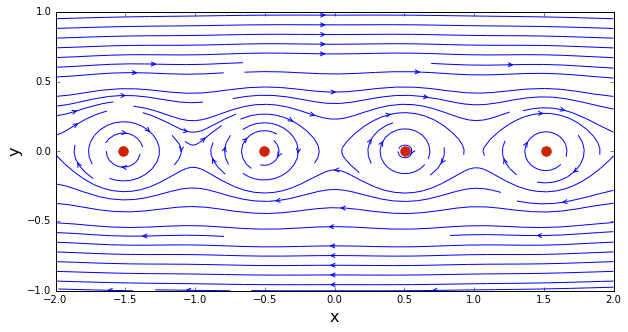

In [7]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex0, v_vortex0, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=90, marker='o');

In [8]:
a=(x_end-x_start)/N

In [9]:
a

0.04

In [10]:
u=numpy.zeros((N,N),dtype=float)
v=numpy.zeros((N,N),dtype=float)

In [11]:
for g in range(N):
    for j in range(N):
        u=gamma/(2*a)*numpy.sinh(2*numpy.pi*Y/a)/(numpy.cosh(2*numpy.pi*Y/a)-numpy.cos(2*numpy.pi*X/a))
        v=-gamma/(2*a)*numpy.sin(2*numpy.pi*X/a)/(numpy.cosh(2*numpy.pi*Y/a)-numpy.cos(2*numpy.pi*X/a))

In [12]:
u

array([[-25., -25., -25., ..., -25., -25., -25.],
       [-25., -25., -25., ..., -25., -25., -25.],
       [-25., -25., -25., ..., -25., -25., -25.],
       ..., 
       [ 25.,  25.,  25., ...,  25.,  25.,  25.],
       [ 25.,  25.,  25., ...,  25.,  25.,  25.],
       [ 25.,  25.,  25., ...,  25.,  25.,  25.]])

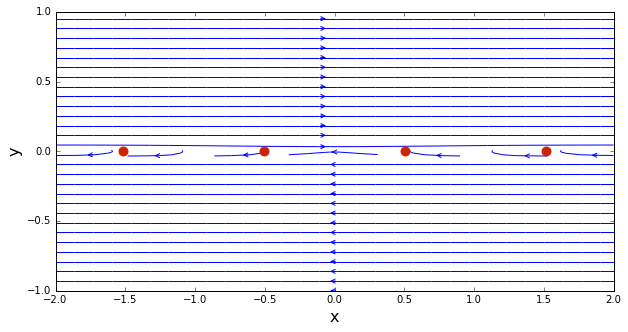

In [14]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');